# The Evolution of the 3 point shot

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
stats_df = pd.read_csv('dataset/nba_team_stats_00_to_21.csv');
df_3PAavg = stats_df.groupby('SEASON')['_3PA'].aggregate(np.mean);
df_3PA = pd.DataFrame(df_3PAavg);
df_3PA.reset_index(inplace=True)

# From the start of the 2000-01 NBA season, how much has the 3pt shot increased?


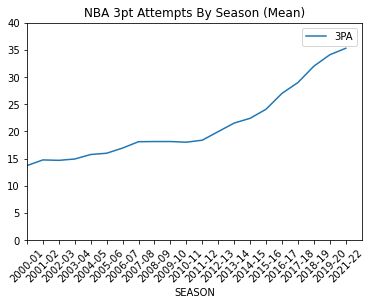

In [4]:
df_3PA.columns=['SEASON', '3PA']
df_3PA.plot(x='SEASON', y='3PA', rot=45, title='NBA 3pt Attempts By Season (Mean)')
plt.xticks(np.arange(0,21, step=1), df_3PA.SEASON.unique())
plt.xlim([0, 21])
plt.ylim([0, 40])
plt.show()

## 2006-07 Season
The first noticing point of increase is from the 2006-07 season. From 2000-01 to 2006-07, it increased from ~13 to ~18 attempts per game. During that season, the player that took the most attempts was Gilbert Arenas.

<!-- Import 2006-07 player stats to show top 5 players with highest 3PA
-->

In [37]:
def player_stats(year):
    url = f'https://www.basketball-reference.com/leagues/NBA_{year}_totals.html'
    dfs = pd.read_html(url)
    df2 = dfs[0]
    df = df2[['Player','Tm','G','3P','3PA','3P%']]
    df = df.assign(_3PA = pd.to_numeric(df['3PA'], errors='coerce'))
    df = df.assign(Games = pd.to_numeric(df['G'], errors='coerce'))
    df = df.assign(_3PA_g = df['_3PA']/df['Games'])
    df = df.drop(columns=['3PA', 'G'])
    df = df.sort_values(by=['_3PA'], ascending=False)
    print(df.head())
    
player_stats(2007)

             Player   Tm   3P   3P%   _3PA  Games    _3PA_g
15   Gilbert Arenas  WAS  205  .351  584.0   74.0  7.891892
7      Rafer Alston  HOU  192  .363  529.0   82.0  6.451220
334     Mike Miller  MEM  202  .406  498.0   70.0  7.114286
39        Raja Bell  PHO  205  .413  496.0   78.0  6.358974
40       Mike Bibby  SAC  173  .360  481.0   82.0  5.865854



<!-- Import 2010-11 2011-12 player stats. show top 3pt stats and see the name differences between the 2 
-->

## 2011-12 Season
However, it was the 2011-12 season that was the catalyst of the 3 point evolution. During that season, Ryan Anderson took the most attempts. Steph Curry at the time was injured and averaged 4.7 3's through 26 games played. 

In [38]:
player_stats(2012)

               Player   Tm   3P   3P%   _3PA  Games    _3PA_g
15      Ryan Anderson  ORL  166  .393  422.0   61.0  6.918033
290  Brandon Jennings  MIL  129  .332  388.0   66.0  5.878788
484       Jason Terry  DAL  138  .378  365.0   63.0  5.793651
143      Kevin Durant  OKC  133  .387  344.0   66.0  5.212121
546    Deron Williams  NJN  115  .336  342.0   55.0  6.218182


## 2012-13 Season
The following season, Curry lead the league in 3's at 7.7/game with a shooting percentage at .453%! Teammate Klay Thompson was 3rd on the list at 6.4/game with a .401% percentage.

<!-- Show analysis of the 14-15 15-16 and 16-17 17-18 seasons as they have the largest span in increase from prior season
-->

In [39]:
player_stats(2013)

             Player   Tm   3P   3P%   _3PA  Games    _3PA_g
123   Stephen Curry  GSW  272  .453  600.0   78.0  7.692308
21    Ryan Anderson  NOH  213  .382  557.0   81.0  6.876543
529   Klay Thompson  GSW  211  .401  526.0   82.0  6.414634
329  Damian Lillard  POR  185  .368  503.0   82.0  6.134146
216    James Harden  HOU  179  .368  486.0   78.0  6.230769


## 2014-15 Season
Splash Bros were lighting up the league. Steph Curry won Most Value Player this season

In [42]:
player_stats(2015)

             Player   Tm   3P   3P%   _3PA  Games    _3PA_g
140   Stephen Curry  GSW  286  .443  646.0   80.0  8.075000
364  Damian Lillard  POR  196  .343  572.0   82.0  6.975610
261    James Harden  HOU  208  .375  555.0   81.0  6.851852
26     Trevor Ariza  HOU  194  .350  555.0   82.0  6.768293
603   Klay Thompson  GSW  239  .439  545.0   77.0  7.077922


## 2015-16 Season
Curry was averaging over 11 3PA per game! 

In [43]:
player_stats(2016)

             Player   Tm   3P   3P%   _3PA  Games     _3PA_g
121   Stephen Curry  GSW  402  .454  886.0   79.0  11.215190
214    James Harden  HOU  236  .359  657.0   82.0   8.012195
537   Klay Thompson  GSW  276  .425  650.0   80.0   8.125000
338  Damian Lillard  POR  229  .375  610.0   75.0   8.133333
183     Paul George  IND  210  .371  566.0   81.0   6.987654


In [6]:
stats_df = pd.read_csv('dataset/nba_team_stats_00_to_21.csv', usecols=['TEAM', 'PTS', '_3PM', 'FTM', 'SEASON'])

series_3PM = stats_df['_3PM']
series_FTM = stats_df['FTM']
series_PTS = stats_df['PTS']

stats_df = stats_df.assign(Pts_from_3 = series_3PM * 3, Pts_from_FT = series_FTM * 1)
stats_df = stats_df.assign(Pts_from_2 = series_PTS - stats_df['Pts_from_3'] - stats_df['Pts_from_FT'])

# create new series calculating point percentage and adds to dataframe
def percentage(category):
    return stats_df[category] / series_PTS * 100

stats_df = stats_df.assign(PTSpct_from_3 = percentage('Pts_from_3'))
stats_df = stats_df.assign(PTSpct_from_FT = percentage('Pts_from_FT'))
stats_df = stats_df.assign(PTSpct_from_2 = percentage('Pts_from_2'))

def szn_avg_df(series):
    return stats_df.groupby('SEASON')[series].aggregate(np.mean)

# calculate NBA mean percentage by season. NOTE: Totals do not add up to 100%; earlier seasons are under 100% and more recent seasons are over 100%
PTSpcnt_by_3_avg = szn_avg_df('Pts_from_3')
PTSpcnt_by_FT_avg = szn_avg_df('Pts_from_FT')
PTSpcnt_by_2_avg = szn_avg_df('Pts_from_2')
PTSpcnt_by_FT_avg.name = 'By FT'
PTSpcnt_by_3_avg.name = 'By 3'
PTSpcnt_by_2_avg.name = 'By 2'


# What percentage of the total points scored per game come from 3's compared to free throws and 2 point shots?

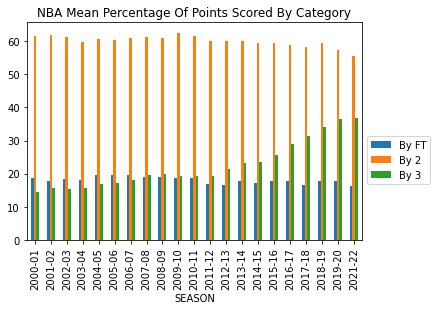

In [7]:
df_avg = pd.concat([PTSpcnt_by_FT_avg, PTSpcnt_by_2_avg, PTSpcnt_by_3_avg], axis=1)
df_avg.plot.bar(title='NBA Mean Percentage Of Points Scored By Category').legend(loc='best',bbox_to_anchor=(1.0, 0.5))
plt.show()


# How do the teams differ in 3 point attempts compared to total field goals?

In [35]:
import re

season = input('From the 2000 to 2021 season, which season would you like to see the percentage of 3pt attempts compared to total shot attempts? (ex: 2000-01) ')
pattern = re.compile('^20[0-2][0-9]\-[0-2][0-9]')

if season == '2020-21':
    print('The data from  this season is missing. Try a different season.')
    
elif pattern.match(season):
    # import dataset with specific columns
    stats_df = pd.read_csv('dataset/nba_team_stats_00_to_21.csv', usecols=['TEAM', '_3PA', 'FGA', 'SEASON'])

    # select series
    series_3PA = stats_df['_3PA']
    series_FGA = stats_df['FGA']

    # create new series and add to dataframe
    stats_df = stats_df.assign(Threes_Att_Pcnt = (series_3PA / series_FGA) * 100)
    stats_df = stats_df.assign(Twos_Att_Pcnt = 100 - stats_df['Threes_Att_Pcnt'])

    # filter dataframe by user input
    df_shot_attempts = stats_df.loc[stats_df['SEASON'] == season, :]

    # create new dataframe 
    df_shot_attempts = pd.DataFrame(df_shot_attempts, columns=['TEAM', 'Threes_Att_Pcnt', 'Twos_Att_Pcnt'])

    df_shot_attempts.plot.bar(x='TEAM', stacked=True, title=f'3pt Attempts Vs. 2pt Attempts {season} Season')
    plt.show()
    
else:
    print(f'{season} was entered incorrectly. Try again.')